In [23]:
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
import os
from tqdm import tqdm
import cv2
import random
import pickle as pk
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
from keras.models import load_model
# from keras import layers

In [3]:
imges_num=500
class_num=10
FAST_RUN = False
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
mydataset="raw-img" 
categories=os.listdir(mydataset)
categories[:4]
# print(categories)
classnames={}
# categories

In [6]:
for i in range(10):
     classnames[i]=categories[i]
classnames

{0: 'cane',
 1: 'cavallo',
 2: 'elefante',
 3: 'farfalla',
 4: 'gallina',
 5: 'gatto',
 6: 'mucca',
 7: 'pecora',
 8: 'ragno',
 9: 'scoiattolo'}

In [7]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
classnames={}
for i in range(5):
  classnames[i]=translate[categories[i]]
classnames

{0: 'dog', 1: 'horse', 2: 'elephant', 3: 'butterfly', 4: 'chicken'}

In [8]:
training =[]
x=0
for category in categories:
    folder=os.path.join(mydataset,category)
    # print(folder)
    x2=0 
    for file in tqdm(os.listdir(folder)):
        # print(file)
        try:
            img=cv2.imread(os.path.join(folder,file))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)# size image for CNN input
            classNum=categories.index(category) #detrmine class
            training.append([img,classNum])
            # plt.imshow(img)
            # plt.show()
        except Exception as e:
            pass
        
        if x2>=imges_num:
            break
        x2+=1
    
    if x>=class_num:    
        break
    x+=1
    # print(x)

 27%|██▋       | 500/1862 [00:03<00:08, 151.43it/s]


In [9]:
len(training)

5010

In [10]:
training[0]
random.shuffle(training)
for trainSample in training[:10]:
    print(trainSample[1])
    
# image_classes = [item[1] for item in training]
# image_classes

4
1
4
8
4
0
2
8
6
2


In [11]:
x_train_data=[]
y_train_data=[]
for feature,label in training:
    x_train_data.append(feature)
    y_train_data.append(label)

In [12]:
x_train_data=np.array(x_train_data)
y_train_data=np.array(y_train_data)

In [13]:
x_train_data=x_train_data.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
# print(x_train_data[0])
print(x_train_data.shape)
# print(y_train_data[:10])
print(y_train_data.shape)

(5010, 200, 200, 3)
(5010,)


In [14]:
print(y_train_data.shape)
y_train_data = to_categorical(y_train_data)
print(y_train_data.shape)

(5010,)
(5010, 10)


In [15]:
x_train_data=x_train_data.astype('float')
x_train_data=x_train_data/255.0

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_train_data,y_train_data,test_size=0.25,random_state=45)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)
y_train

(3757, 200, 200, 3)
(3757, 10)
(1253, 200, 200, 3)
(1253, 10)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [17]:
print(x_train.shape)
print(y_train.shape)

(3757, 200, 200, 3)
(3757, 10)


In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [30]:
model=keras.models.Sequential()
model.add(Conv2D(32,(3,3),input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()

In [32]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
118/118 [==============================] - 164s 1s/step - loss: 2.2008 - accuracy: 0.2060
Epoch 2/10
 90/118 [=====================>........] - ETA: 37s - loss: 1.8718 - accuracy: 0.3340

KeyboardInterrupt: 

In [22]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

16/16 [==============================] - 4s 227ms/step - loss: 2.4579 - accuracy: 0.5070
2.45788311958313
0.5069860219955444


In [23]:

model.save("animals.h5")


In [24]:
model = load_model("animals.h5")

In [25]:
def predictImg():
    for i in range(32):
        testimgnum=i
        predicted=model.predict(np.array([x_test[testimgnum]]))
        print(predicted.shape)
        # predicted 
        predictedClass=np.argmax(predicted[0])
        # print( f'predicted Class {predictedClass}')
        # print( f'actual class {y_test[testimgnum] }')
        # x_test.shape
        actual=np.argmax(y_test[testimgnum])
        plt.imshow(x_test[testimgnum],cmap='gray')
        plt.title(f'predicted Class is [ {subClassnames[predictedClass]} ] Actual class is [ {subClassnames[actual]} ] ')
        plt.xticks([])
        plt.yticks([])
        plt.show()

1/1 [==============================] - 0s 145ms/step
(1, 10)


NameError: name 'subClassnames' is not defined

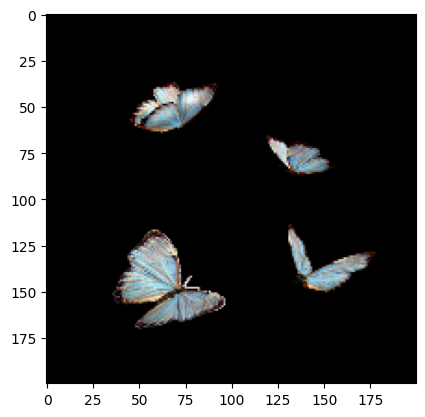

In [26]:
predictImg()